# Project 1 Applied ML 
# Professor Uri Smashnov
# Net ID rxb220087 
# Rakshit Bhardwaj
# Date Nov 4th 2023

# Project 1 Starter

**Here are some tips for submitting your project. You can use the points as partial check list before submission.**

- **Give your notebook a clear and descriptive title.** 
- **Explain your work in Markdown cells.** This will make your notebook easier to read and understand. You can use different colors of font to highlight important points.
- **Remove any unnecessary code or text.** For example, you should not include the template for training and scoring in your final submission.
- **Package your submission in a single file.** I will deduct points for multiple files or incorrect folder structure.
- **Name your notebooks correctly.** Include your name and Net-ID in the file name.
- **Train your TE/WOE encoders on the training set only.** You can train them on the full dataset for your final model.
- **Test your scoring function.** Most students scoring functions in the past din't work, so make sure to test yours before submitting your project.
- **Avoid common mistakes in your scoring function.** For example, your scoring function should not:
  - drop records, expect the target to be passed
  - fit TE/WOE/Scalers
  - return anything other than a Pandas DF.
- **Make sure you have the required number of engineered features.** 
- **Don't create features and then not use them in the model**, if there is a reason not to use the feature in the model, explain.
- **Don't include models in your notebook that you didn't train.** This is considered cheating and will result in a grade of zero for the project.
- **Consistently display model performance metrics.** Use AUC or AUCPR for all models and iterations, and don't switch between metrics. For sure don't use accuracy, it is misleading metric for the imbalanced datasets. 
- **Discuss your model results in a Markdown cell.** Don't just print the results; explain what they mean.
- **Include a conclusion section in your notebook.** This is your chance to summarize your findings and discuss the implications of your work.
- **Treat your notebook like a project report that will be read by your manager who can't read Python code.** Make sure your notebook is clear, concise, and easy to understand.
- **Display a preview of your dataset that you used for training.** This will help me understand what features you used in your model.
- **Use the libraries versions specified on eLearning.** For example, you should use H2O 3.42.0.2  
- **Use Python 3.10.11.** If you use another version and your code doesn't work on 3.10.11, it will be considered a bug in your code.
- **When running H2O and want to suppress long prints (for example model summary), include ";" at the end of the command.**
- **Don't include the dataset with your deliverables.** 

## Project Requirements Summary

**This is draft - version 0 - changes are possible and will be announced.**

Project 1 is to allow students to practice Data Science concepts learned so far.

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode/replace missing values
    - Replace features values that appear incorrect
- Encode categorical variables
- Split dataset to Train/Validation/Test
- Add engineered features
- Train and tune ML model
- Provide final metrics using Test dataset
- Provide a scoring function that can be used to score new data. You can test your scoring function on the provided "scoring" dataset.

**Don't use PCA or TruncatedSVD for this project.** The goal of using Linear models is to be able to interpret the results via coefficients, and PCA/TruncatedSVD will make use of coefficients unusable for interpretation.

### Types of models to train

Your final submission should include single model. 
The model set you should try to come up with best model per type of model:
1. Identify best model from: Sklearn Logistic Regression - try all combinations of regularization
2. Identify best model from: H2O-3 GLM - try different combinations of regularization

**Evaluation metric: AUCPR**

### Feature engineering

You should train/fit categorical features scalers and encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.  
Your final model should have at least **10** new engineered features.   
On-hot-encoding, label encoding, and target encoding **is not included in the** **10** features to create.    
You can attempt target encoding, however the technique is not expected to produce improvement for Linear models.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)


**Note**: 
- You don't have to perform feature engineering using H2O-3 even if you decided to use H2O-3 GLM for model training.
- It is OK to perform feature engineering using any technique, as long as you can replicate it correctly in the Scoring function.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.

### Scoring function

The Project-1 will be graded based on the completeness and performance of your final model against the hold-out dataset.
The hold-out dataset will not be known to the students. As part of your deliverables, you will need to submit a scoring function. 

You need to submit a scoring function for the best model you trained, either Sklearn or H2O-3 model.  

The scoring function will perform the following:
- Accept dataset in the same format as provided with the project, minus "MIS_Status" column
- Load trained model and any encoders/scalers that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record
    - Record ID
    - Record label as determined by final model (0 or 1)
    - If your model returns probabilities, you need to assign the label based on maximum F1 threshold
    
Scoring function header:
```
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    l = data.shape[0]
    return l*[0]
```

Look for full example of scoring function at the bottom of the notebook. **Don't copy as is - this is just an example**

### Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format.
    - Jupyter notebook with scoring function. `ipynb` format.
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file



Your notebook should include explanations about your code and be designed to be easily followed and results replicated. Once you are done with the final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: To speed up progress, first produce working code using a small subset of the dataset.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Loading the CSV file and dropping the index

In [2]:
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project1/SBA_loans_project_1.csv")
df.drop(columns="index",inplace=True)

# Checking Null Values

In [3]:
df.isnull().sum()

City                   25
State                  12
Zip                     0
Bank                 1405
BankState            1411
NAICS                   0
NoEmp                   0
NewExist              128
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4094
LowDoc               2319
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [4]:
#show unique values in each column and its data type
for col in df.columns:
    print(f'{col} unique values are {df[col].unique()}')
    print("\n")
    print(f'{col} data type is {df[col].dtype}')


City unique values are ['GLEN BURNIE' 'WEST BEND' 'SAN DIEGO' ... 'Orange park' 'GREENHAVEN'
 'SCHAFFERSTOWN']


City data type is object
State unique values are ['MD' 'WI' 'CA' 'MA' 'MO' 'OH' 'IL' 'GA' 'MI' 'NY' 'SC' 'FL' 'KS' 'ID'
 'AZ' 'NH' 'NM' 'KY' 'NJ' 'TX' 'PA' 'MN' 'OK' 'OR' 'WA' 'IN' 'UT' 'AL'
 'MS' 'CO' 'NC' 'CT' 'ME' 'HI' 'LA' 'IA' 'MT' 'RI' 'WV' 'NV' 'AR' 'VA'
 'TN' 'ND' 'VT' 'WY' 'AK' 'SD' 'DE' 'NE' 'DC' nan]


State data type is object
Zip unique values are [21060 53095 92128 ... 32006 56038 14784]


Zip data type is int64
Bank unique values are ['BUSINESS FINANCE GROUP, INC.' 'JPMORGAN CHASE BANK NATL ASSOC'
 'UMPQUA BANK' ... 'WILSHIRE CREDIT CORP' 'NEVADA BANK & TRUST COMPANY'
 'FIRST COMMUN BK OF OZARKS']


Bank data type is object
BankState unique values are ['VA' 'IL' 'OR' 'MA' 'OH' 'CA' 'SD' 'CT' 'RI' 'SC' 'WI' 'GA' 'MI' 'AZ'
 'DE' 'NY' 'NM' 'KY' 'NC' 'NJ' 'MN' 'WA' 'UT' 'IN' 'AL' 'MS' 'TX' 'DC'
 'CO' 'ID' 'PA' 'NH' 'MO' 'MD' 'HI' 'TN' 'IA' 'FL' 'LA' 'MT' nan 'KS' 

# Removing extra variables
In RevLineCr, LowDoc, and NewExist

In [5]:
for i in df['RevLineCr']:
    if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",df['RevLineCr'].unique())

for i in df['LowDoc']:
    if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",df['LowDoc'].unique())

for i in df['NewExist']:
    if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
print("NewExist",df['NewExist'].unique())

RevLineCr ['N' 'Y']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


In [6]:
df.isnull().sum()

City                   25
State                  12
Zip                     0
Bank                 1405
BankState            1411
NAICS                   0
NoEmp                   0
NewExist             1060
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

The dataset has a large number of missing values, as can be seen. We'll substitute the correct values for the missing ones. If the column is numeric, for instance, the column median will be used to fill in the missing numbers. In the event that the column is categorical, the mode of the column will be used to fill in the missing values.

# Filling Categorical Values
With the mode aggregation

In [7]:
category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
for column in category_cols:
  df[column]=df[column].fillna(df[column].mode()[0])

In [8]:
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [9]:
df.head()
h2o_df = df.copy() # Keeping dataset handy for H2O-GLM Model

After the missing values have been restored, the dataset will be divided into training and testing datasets. Let's divide the dataset into 30% for testing and 70% for training. For repeatability, random state 123 is used.

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df,test_size=0.3,random_state=123)
X_train.shape, X_test.shape

((566472, 19), (242775, 19))

Training set has 566472 rows and testing set has 242775 samples

Target encoding is a data preprocessing technique used to convert categorical variables into numerical values that can be used by machine learning algorithms. It works by replacing each category with the average value of the target variable for that category. This can be helpful for algorithms that cannot handle categorical variables directly.

In this case the target variable is "MIS_Status"

In [11]:
# Target encoder
import category_encoders as ce
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(X_train, X_train['MIS_Status'])

train_encoded = encoder.transform(X_train)
test_encoded = encoder.transform(X_test)

# Renaming the columns
train_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in train_encoded.columns}, inplace=False)
test_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in test_encoded.columns}, inplace=False)

train_encoded.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
217613,0.114650,0.184773,93001,0.031447,0.218517,235910,56,0.17044,0,0,1,0.071674,0.15307,0.187063,305000.0,0.0,305000.0,244000.0,0
95730,0.137597,0.165992,44039,0.128698,0.159167,484121,0,0.17044,0,0,0,0.243491,0.15307,0.187063,24000.0,0.0,24000.0,12000.0,0
780446,0.139151,0.116799,68122,0.175694,0.159167,451120,20,0.17044,5,15,38510,0.243491,0.15307,0.187063,870400.0,0.0,974500.0,730875.0,0
337263,0.140704,0.197662,14208,0.118949,0.167297,321114,50,0.17044,0,0,1,0.071674,0.15307,0.187063,200000.0,0.0,200000.0,150000.0,0
199634,0.140354,0.144273,16335,0.193277,0.078307,0,19,0.17044,0,0,1,0.071674,0.15307,0.187063,370000.0,0.0,370000.0,296000.0,0


StandardScaler in scikit-learn is a preprocessing technique that centers and scales numerical features such that they have a mean of zero and a standard deviation of one.

We will make use of the StandardScaler, which is used to transform both the training and test data in the same way, ensuring that the features have the same mean and standard deviation in both datasets.

Here we will scale it on the training set and transform on both training and testing

In [12]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross']
scaler = StandardScaler()
train_encoded[numerical_columns] = scaler.fit_transform(train_encoded[numerical_columns])
test_encoded[numerical_columns] = scaler.transform(test_encoded[numerical_columns])

train_encoded.head()



,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
217613,0.114650,0.184773,93001,0.031447,0.218517,235910,0.600407,0.17044,-0.035373,-0.045454,1,0.071674,0.15307,0.187063,0.358949,-0.002296,0.394801,0.410973,0
95730,0.137597,0.165992,44039,0.128698,0.159167,484121,-0.153600,0.17044,-0.035373,-0.045454,0,0.243491,0.15307,0.187063,-0.614207,-0.002296,-0.594552,-0.600302,0
780446,0.139151,0.116799,68122,0.175694,0.159167,451120,0.115688,0.17044,-0.013978,0.018584,38510,0.243491,0.15307,0.187063,2.317036,-0.002296,2.751996,2.533233,0
337263,0.140704,0.197662,14208,0.118949,0.167297,321114,0.519620,0.17044,-0.035373,-0.045454,1,0.071674,0.15307,0.187063,-0.004686,-0.002296,0.025114,0.001232,0
199634,0.140354,0.144273,16335,0.193277,0.078307,0,0.102223,0.17044,-0.035373,-0.045454,1,0.071674,0.15307,0.187063,0.584056,-0.002296,0.623655,0.637638,0


We have created Feature extraction by making use of old variables in the following way


(1) Log_Disbursement which gives the natural logarithmic form of DisbursementGross variable

(2) Log_GrAppv the logarithmic version of the approved loan amount by the bank

(3) Log_SBA_Appv, the logarithmic amount of the approved loan that will be assisted by SBA 

(4) Log_BalanceGross, is the logarithmic amount of total amount in an account or the total value of a financial asset or liability before any deductions or adjustments are made.

(5) TotalJobs variable which is an addition of Createjobs(New people recruited) and RetainedJob (workers working before)

(6) IncomeToLoan its values are calculated by dividing the 'DisbursementGross' column by the 'SBA_Appv' column for each corresponding row. This ratio can help you analyze the relationship between the amount disbursed and the approved SBA loan amount in terms of income.

(7)  EmployeesToLoanRatio, its values are calculated by dividing the 'NoEmp' column (number of employees) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the relationship between the number of employees and the size of the SBA loan approved for each entry in the dataset.

(8) JobPerLoan, its values are calculated by dividing the 'TotalJobs' column (representing the total number of jobs) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the impact of the SBA loan on job creation or support, expressed as the number of jobs per unit of loan amount approved.

(9) Gauren_SBA_Appv, Its values are calculated by dividing the 'GrAppv' column (gross amount approved by the lender) by the 'SBA_Appv' column (the approved SBA loan amount) for each corresponding row. This ratio helps you analyze the extent to which the SBA is guaranteeing the loan relative to the total loan amount approved by the lender.

(10) DefaultRate, Finally, we create a new feature 'DefaultRate' in the 'train_encoded' DataFrame and set its value to the calculated default rate for the particular group of loans based on the "MIS_Status" variable. This feature will represent the percentage of loans in the group that are classified as defaults.

In [13]:
# Adding Features
import numpy as np
# Apply the log transformation to the specific feature in your training data
#small_constant = 1e-10  # You can adjust this constant as needed
# df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])
train_encoded['TotalJobs'] = train_encoded['CreateJob'] + train_encoded['RetainedJob']
#train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
# Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
train_encoded['IncomeToLoanRatio'] = train_encoded['DisbursementGross'] / train_encoded['SBA_Appv']
# Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
train_encoded['EmployeesToLoanRatio'] = train_encoded['NoEmp'] / train_encoded['SBA_Appv']
# Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
#train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
# Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
train_encoded['JobPerLoan'] = train_encoded['TotalJobs'] / train_encoded['SBA_Appv'] 
# Calculate SBA's Gaurenteed Portion of Approved Loan
train_encoded['Gauren_SBA_Appv'] = train_encoded['GrAppv'] / train_encoded['SBA_Appv']
# Filter the DataFrame to include only the relevant rows
default_group = train_encoded[train_encoded['MIS_Status'].isin([0, 1])]
# Calculate the total number of loans in the filtered group
total_loans = len(default_group)
# Calculate the number of defaults (CHGOFF) in the filtered group
default_loans = len(default_group[default_group['MIS_Status'] == 1])
# Calculate the default rate as a percentage
default_rate = (default_loans / total_loans) * 100
# Create a new feature 'DefaultRate' with the calculated default rate
train_encoded['DefaultRate'] = default_rate


In [14]:
train_encoded.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'MIS_Status', 'Log_DisbursementGross', 'Log_GrAppv',
       'Log_SBA_Appv', 'Log_BalanceGross', 'TotalJobs', 'IncomeToLoanRatio',
       'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv', 'DefaultRate'],
      dtype='object')

In [15]:
train_encoded.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,Log_DisbursementGross,Log_GrAppv,Log_SBA_Appv,Log_BalanceGross,TotalJobs,IncomeToLoanRatio,EmployeesToLoanRatio,JobPerLoan,Gauren_SBA_Appv,DefaultRate
217613,0.114650,0.184773,93001,0.031447,0.218517,235910,0.600407,0.17044,-0.035373,-0.045454,1,0.071674,0.15307,0.187063,0.358949,-0.002296,0.394801,0.410973,0,0.306712,0.332752,0.344279,-0.002298,-0.080828,0.873414,1.460941,-0.196674,0.960651,17.509603
95730,0.137597,0.165992,44039,0.128698,0.159167,484121,-0.153600,0.17044,-0.035373,-0.045454,0,0.243491,0.15307,0.187063,-0.614207,-0.002296,-0.594552,-0.600302,0,-0.952455,-0.902762,-0.917047,-0.002298,-0.080828,1.023163,0.255872,0.134645,0.990421,17.509603
780446,0.139151,0.116799,68122,0.175694,0.159167,451120,0.115688,0.17044,-0.013978,0.018584,38510,0.243491,0.15307,0.187063,2.317036,-0.002296,2.751996,2.533233,0,1.199072,1.322288,1.262213,-0.002298,0.004606,0.914656,0.045668,0.001818,1.086357,17.509603
337263,0.140704,0.197662,14208,0.118949,0.167297,321114,0.519620,0.17044,-0.035373,-0.045454,1,0.071674,0.15307,0.187063,-0.004686,-0.002296,0.025114,0.001232,0,-0.004697,0.024804,0.001231,-0.002298,-0.080828,-3.803563,421.786886,-65.609474,20.385638,17.509603
199634,0.140354,0.144273,16335,0.193277,0.078307,0,0.102223,0.17044,-0.035373,-0.045454,1,0.071674,0.15307,0.187063,0.584056,-0.002296,0.623655,0.637638,0,0.459989,0.484680,0.493255,-0.002298,-0.080828,0.915969,0.160316,-0.126761,0.978071,17.509603


In [16]:
print(train_encoded.head())
h2o_df = train_encoded.copy()
# Saving  as a h2o_df.csv which will be imported directly in h2O for training as all encoding, scaling and feature extraction has already been done during Scikit learn model
h2o_df.to_csv('D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project1/h2o_df.csv', index=False)

            City     State    Zip      Bank  BankState   NAICS     NoEmp  \
217613  0.114650  0.184773  93001  0.031447   0.218517  235910  0.600407   
95730   0.137597  0.165992  44039  0.128698   0.159167  484121 -0.153600   
780446  0.139151  0.116799  68122  0.175694   0.159167  451120  0.115688   
337263  0.140704  0.197662  14208  0.118949   0.167297  321114  0.519620   
199634  0.140354  0.144273  16335  0.193277   0.078307       0  0.102223   

        NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
217613   0.17044  -0.035373    -0.045454              1    0.071674   
95730    0.17044  -0.035373    -0.045454              0    0.243491   
780446   0.17044  -0.013978     0.018584          38510    0.243491   
337263   0.17044  -0.035373    -0.045454              1    0.071674   
199634   0.17044  -0.035373    -0.045454              1    0.071674   

        RevLineCr    LowDoc  DisbursementGross  BalanceGross    GrAppv  \
217613    0.15307  0.187063           0.35

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

target_col = "MIS_Status"
cols_to_drop = ['City', 'State', 'Zip','Bank', 'BankState', 'LowDoc','RevLineCr','MIS_Status', 'index']
y = train_encoded[target_col]
X = train_encoded.drop(columns=[target_col])

param_grid = {'C':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                'penalty': ['l2', 'l1', 'elasticnet'],
                'solver': ['lbfgs'],
                 'l1_ratio': [0.1, 0.3, 0.7] # 'newton-cholesky', 'sag'
                }


clf = LogisticRegression(max_iter=1000, random_state=0, n_jobs=-1)
columns_to_train = [x for x in X.columns if x not in cols_to_drop]
print("Training on following columns:", columns_to_train)
clf.fit(X[columns_to_train], y)
grid1 = GridSearchCV(clf.fit(X[columns_to_train], y), 
                    param_grid, cv =7 , return_train_score= True)
grid1.fit(X[columns_to_train], y)
print("Best parameters found: ", grid1.best_params_)
print("Best cross-validation score: {:.2f}".format(grid1.best_score_))

Training on following columns: ['NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Log_DisbursementGross', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'TotalJobs', 'IncomeToLoanRatio', 'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv', 'DefaultRate']
Best parameters found:  {'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.82


Best Hyperparameters Found:

    'C': 10  
    In logistic regression, the parameter 'C' is the regularization strength or the inverse of the regularization parameter. It controls the trade-off between fitting the training data well and preventing overfitting.
A smaller 'C' value increases the regularization strength, leading to simpler models with smaller coefficients. This helps to prevent overfitting but may sacrifice some accuracy on the training data.
A larger 'C' value decreases the regularization strength, allowing the model to fit the training data more closely. However, this may lead to overfitting.


    'penalty': 'l2'
        L2 regularization is a type of regularization used in logistic regression. It adds a penalty term to the loss function, which encourages the model to keep all feature weights small.
    The penalty term is proportional to the square of the magnitude of feature coefficients. It helps prevent overfitting by reducing the influence of individual features in the model.
    L2 regularization is controlled by the 'C' parameter, with a smaller 'C' increasing the strength of regularization and leading to smaller feature coefficients.
    'solver': 'lbfgs'
    LBFGS is an optimization algorithm used for logistic regression and other machine learning models.
It's an iterative numerical optimization algorithm that finds the optimal values of the model parameters (coefficients) by minimizing the logistic regression loss function.
LBFGS is suitable for problems with a large number of features, and it efficiently approximates the Hessian matrix, which is used to update the model parameters.
It is one of the solvers available for logistic regression in scikit-learn and is known for its efficiency and effectiveness.

Best Cross-Validation Score:

    The best cross-validation score achieved by the model is 0.82.

In [18]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = grid1.best_params_

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [19]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_optimal_threshold(classifier, X, y):
    # Predict probabilities
    y_prob = classifier.predict_proba(X)[:, 1]
    
    # Generate a range of thresholds
    thresholds = np.linspace(0, 1, 100)
    
    # Compute F1 scores for different thresholds
    f1_scores = [f1_score(y, (y_prob > threshold).astype(int), average='macro') for threshold in thresholds]
    
    # Find the optimal threshold with the highest F1 score
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    
    return optimal_threshold

The following parameters for controlling regularization strength and type:

C: This parameter controls the inverse of the regularization strength in logistic regression models. A smaller C value increases the regularization strength, while a larger C value reduces it.

penalty: This parameter specifies the type of regularization penalty applied. You have options for 'l2' (ridge), 'l1' (lasso), and 'elasticnet' penalties.

'solver': The 'lbfgs' solver is chosen for optimization

For 'l2' (ridge) regularization, the regularization term is typically represented as 'alpha' in some libraries (e.g., scikit-learn). In our case, it is controlled indirectly through the penalty and C parameters.

For 'elasticnet' regularization, 'alpha' is a parameter that controls the balance between 'l1' and 'l2' regularization, and 'lambda' is the regularization strength. However, in your parameter grid, these are not explicitly defined.







For Lasso (L1 Regularization):

When alpha is set to 0, there is no regularization, and the model aims to fit the training data as closely as possible, potentially leading to overfitting.

As alpha increases, the amount of L1 regularization also increases, causing some feature coefficients to be pushed to zero. This results in feature selection and simplifies the model.

A higher alpha value indicates stronger regularization, which can help prevent overfitting by limiting the impact of individual features


For Ridge (L2 Regularization):

Similar to Lasso, when alpha is set to 0, there is no regularization, and the model aims to fit the data closely.

As alpha increases, the amount of L2 regularization increases, causing feature coefficients to shrink but not necessarily become zero. This results in a smoother and more stable model.

A higher alpha value indicates stronger regularization and helps prevent overfitting by reducing the influence of individual features.

In practice, the choice of alpha depends on the specific problem and dataset. You typically perform hyperparameter tuning to find the optimal alpha value that balances model complexity and performance.

lasso model <alpha = 0.1> Approx
ridge model <alpha = 1.0> Approx

## H2O Model

In [20]:
import h2o
try:
    h2o.cluster().shutdown()
except:
    pass 

In [21]:
from h2o.frame import H2OFrame
h2o.init(max_mem_size = "4G", nthreads=16)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from D:\Work\Gre\UTD\Courses\Fall\MIS6341\Softwares\Python\ml-fall-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Asus\AppData\Local\Temp\tmp0ch2yx2u
  JVM stdout: C:\Users\Asus\AppData\Local\Temp\tmp0ch2yx2u\h2o_Asus_started_from_python.out
  JVM stderr: C:\Users\Asus\AppData\Local\Temp\tmp0ch2yx2u\h2o_Asus_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 months and 14 days
H2O_cluster_name:,H2O_from_python_Asus_kzk1ma
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


We import an H2O DataFrame (df_h) from a CSV file located at the specified path and then display its first few rows using df_h.head(). It is imported like a
a pandas data frame, only difference being that it resides inside a cluster

In [22]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Specify the path to your CSV file
csv_file_path = 'D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project1/h2o_df.csv'

df_h = h2o.import_file(csv_file_path)

df_h.head()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,Log_DisbursementGross,Log_GrAppv,Log_SBA_Appv,Log_BalanceGross,TotalJobs,IncomeToLoanRatio,EmployeesToLoanRatio,JobPerLoan,Gauren_SBA_Appv,DefaultRate
0.11465,0.184773,93001,0.0314465,0.218517,235910,0.600407,0.17044,-0.0353733,-0.0454543,1,0.0716743,0.15307,0.187063,0.358949,-0.00229552,0.394801,0.410973,0,0.306712,0.332752,0.344279,-0.00229816,-0.0808276,0.873414,1.46094,-0.196674,0.960651,17.5096
0.137597,0.165992,44039,0.128698,0.159167,484121,-0.1536,0.17044,-0.0353733,-0.0454543,0,0.243491,0.15307,0.187063,-0.614207,-0.00229552,-0.594552,-0.600302,0,-0.952455,-0.902762,-0.917047,-0.00229816,-0.0808276,1.02316,0.255872,0.134645,0.990421,17.5096
0.139151,0.116799,68122,0.175694,0.159167,451120,0.115688,0.17044,-0.0139777,0.0185835,38510,0.243491,0.15307,0.187063,2.31704,-0.00229552,2.752,2.53323,0,1.19907,1.32229,1.26221,-0.00229816,0.00460579,0.914656,0.045668,0.00181815,1.08636,17.5096
0.140704,0.197662,14208,0.118949,0.167297,321114,0.51962,0.17044,-0.0353733,-0.0454543,1,0.0716743,0.15307,0.187063,-0.0046858,-0.00229552,0.0251141,0.00123195,0,-0.00469681,0.0248039,0.00123119,-0.00229816,-0.0808276,-3.80356,421.787,-65.6095,20.3856,17.5096
0.140354,0.144273,16335,0.193277,0.0783071,0,0.102223,0.17044,-0.0353733,-0.0454543,1,0.0716743,0.15307,0.187063,0.584056,-0.00229552,0.623655,0.637638,0,0.459989,0.48468,0.493255,-0.00229816,-0.0808276,0.915969,0.160316,-0.126761,0.978071,17.5096
0.164738,0.188249,77381,0.141056,0.180023,532490,-0.140136,0.17044,-0.0268151,-0.0411851,1,0.243491,0.251569,0.187063,-0.607811,-0.00229552,-0.608635,-0.60902,0,-0.93601,-0.938115,-0.939099,-0.00229816,-0.0680002,0.998014,0.230101,0.111655,0.999368,17.5096
0.172811,0.223814,48334,0.214858,0.198182,811111,-0.0458851,0.17044,-0.0353733,-0.0113008,0,0.243491,0.251569,0.187063,-0.584843,-0.00229552,-0.65335,-0.636699,0,-0.879098,-1.05944,-1.01252,-0.00229816,-0.0466741,0.918554,0.0720672,0.0733063,1.02615,17.5096
0.275041,0.184773,90016,0.182257,0.180023,453210,-0.0997428,0.17044,-0.0353733,-0.0454543,50564,0.0716743,0.15307,0.0897581,-0.437584,-0.00229552,-0.414989,-0.391073,1,-0.575514,-0.536125,-0.496057,-0.00229816,-0.0808276,1.11893,0.255049,0.206682,1.06116,17.5096
0.170819,0.179137,19805,0.214858,0.198182,722110,-0.113207,0.17044,-0.0353733,-0.0326467,1,0.243491,0.251569,0.187063,-0.680008,-0.00229552,-0.661447,-0.641712,0,-1.13946,-1.08308,-1.02642,-0.00229816,-0.06802,1.05968,0.176414,0.105998,1.03075,17.5096
0.0820406,0.0793893,85267,0.329864,0.0762233,484220,-0.140136,0.186978,-0.0310942,-0.0369159,1,0.187265,0.15307,0.187063,-0.664423,-0.00229552,-0.645604,-0.631905,0,-1.0919,-1.03734,-0.999413,-0.00229816,-0.0680101,1.05146,0.221768,0.107627,1.02168,17.5096


In [23]:
df_h.describe()

Rows:566472
Cols:29

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,Log_DisbursementGross,Log_GrAppv,Log_SBA_Appv,Log_BalanceGross,TotalJobs,IncomeToLoanRatio,EmployeesToLoanRatio,JobPerLoan,Gauren_SBA_Appv,DefaultRate
type,real,real,int,real,real,int,real,real,real,real,int,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real,real,real,real
mins,0.002343996205589325,0.07006369426751592,0.0,0.0,0.05249080575058509,0.0,-0.153600434175742,0.17044022221184818,-0.03537327806289165,-0.04545428677284537,0.0,0.07167428097535124,0.1530699251248866,0.08975812818488481,-0.6973236731572443,-0.002295517679303139,-0.6783474528695129,-0.6521736527433548,0.0,-1.195091272676935,-1.1342833622057995,-1.056051925886739,-0.002298156418966926,-0.08082756483573703,-3249.7995325776096,-6217.269704293639,-6946.62619277787,-1425.410980018344,17.509603299015662
mean,0.17567877828071593,0.1750960329901566,53853.91636479826,0.17619418541215054,0.175097323980688,398590.7101374825,8.12805739334945e-18,0.1750960329901566,7.224939905199511e-18,-5.5190513164718486e-18,2748.614023288001,0.17509603299015666,0.17509603299015658,0.17509603299015658,-1.204156650866585e-18,5.218012153755202e-18,1.7058885887276622e-17,-6.70313868982399e-17,0.1750960329901566,-0.2785689460749845,-0.279916152561005,-0.27948106942859474,-0.0022487117990158925,1.0636717082654834e-17,2.112198455611862,0.4918000867212119,-0.2489405491913917,1.496274454678428,17.509603299015662
maxs,0.6626422957411695,0.27204321821338995,99999.0,0.8892988929799549,0.3800327332242226,928120.0,134.4770591134275,0.1869783599731616,37.62078512466269,40.51182843681707,92006.0,0.2434914068009948,0.25156900049734354,0.18706258164639383,37.39775945774547,552.889522851626,18.58692184996103,23.199528251630852,1.0,3.6479991104368574,2.9748620909714023,3.186333139238373,6.316965249625691,75.14418220289946,6396.558729319238,37035.12034202456,11627.399763221902,1043.390760820282,17.509603299015662
sigma,0.06639769763247672,0.04199181924329759,31185.22931842036,0.12227701398294173,0.07450052965800262,263321.75739069114,1.000000882657328,0.007437873600660589,1.0000008826573281,1.0000008826573283,12747.306218543337,0.07945017170394587,0.041041501003144853,0.031956251232178115,1.0000008826573277,1.00000088265733,1.0000008826573281,1.0000008826573283,0.38004955887207637,0.6751342455877893,0.673495391264487,0.6724602419470982,0.015557287489121684,1.9967248008580234,48.40854150735596,57.47035513066714,29.416621353104784,11.623336619659533,4.396234168225107e-15
zeros,0,0,176,20864,0,127266,0,0,0,0,131369,0,0,0,0,0,0,0,467285,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.11464974937637376,0.18477258385515263,93001.0,0.031446540880519576,0.21851689918783204,235910.0,0.6004066600002538,0.17044022221184818,-0.03537327806289165,-0.04545428677284537,1.0,0.07167428097535124,0.1530699251248866,0.18706258164639383,0.35894908638142187,-0.002295517679303139,0.394801069280922,0.4109726208502541,0.0,0.3067116704358818,0.3327518024385963,0.3442792686074715,-0.002298156418966926,-0.08082756483573703,0.873413624583551,1.4609407769259248,-0.19667384330497317,0.9606505378974516,17.509603299015662
1,0.137596588115639,0.1659919028340081,44039.0,0.12869797760320908,0.15916691590309687,484121.0,-0.153600434175742,0.17044022221184818,-0.03537327806289165,-0.04545428677284537,0.0,0.2434914068009948,0.1530699251248866,0.18706258164639383,-0.6142071281443656,-0.002295517679303139,-0.5945517349325695,-0.6003022273404686,0.0,-0.9524546549496404,-0.9027619966303708,-0.9170465858109552,-0.002298156418966926,-0.08082756483573703,1.0231631671025114,0.25587183785114576,0.1346447858336776,0.99042067121194,17.509603299015662
2,0.1391509433962264,0.11679920477137178,68122.0,0.1756944756092088,0.15916691590309687,451120.0,0.11568781374425648,0.17044022221184818,-0.013977733515888482,0.01858352805

To check if the data frame is indeed H2OFrame

In [24]:
if isinstance(df_h, h2o.H2OFrame):
    print('It is H2O data frame')
else:
    print('It is not H2O data frame')

It is H2O data frame


The provided code splits an H2O DataFrame into training, validation, and test sets and separates predictor columns from the response column for machine learning tasks.

The first number, 0.7, specifies that 70% of the data will be used for training (the "train" subset).

The second number, 0.15, specifies that 15% of the data will be used for validation (the "valid" subset).

The remaining 15% not specified is implicitly used for testing (the "test" subset).

The seed=1234 parameter is used to set the random seed for reproducibility, ensuring that the same split is obtained when the code is executed multiple times.

In [25]:
# Split the data as described above
train, valid, test = df_h.split_frame([0.7, 0.15], seed=1234)

# Prepare predictors and response columns
train_X = df_h.columns
train_y = "MIS_Status"
train_X.remove(train_y)

Since we already imported the H2O GLM estimator, we will just instantiate our model. For simplicity, the name of our model will be glm. To build a GLM, you just need to define the family, and you are ready to go. However, we will set a random seed for reproducibility purposes, and also a model id to be able to retrieve the model later on if we need to access it. You can instantiate your GLM, as shown below.

In [26]:
glm = H2OGeneralizedLinearEstimator(family = "binomial", seed = 42, model_id = 'default_glm')

In [27]:
%time glm.train(x = train_X, y = train_y, training_frame = train, validation_frame = valid)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
CPU times: total: 0 ns
Wall time: 973 ms


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: default_glm


GLM Model: summary
    family    link    regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 2.505E-4 )  27                            22                             4                       py_3_sid_9cdc

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12059947193887977
RMSE: 0.34727434679066027
LogLoss: 0.38760076479874667
AUC: 0.7768657635596997
AUCPR: 0.4455013625622545
Gini: 0.5537315271193994
Null degrees of freedom: 396643
Residual degrees of freedom: 396621
Null deviance: 367114.9304608208
Residual deviance: 307479.03550566814
AIC: 307525.03550566814

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22939337808642146
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      267868  59606  0.182    (59606.0/327474.0)
1      29773   39397  0.4304   (29773.0/69170.0)
Total  297641  99003  0.2253   (89379.0/396644.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.229393     0.468529  225
max f2                       0.121245     0.596597  301
max f0point5                 0.345963     0.462715  165
max accuracy                 0.509815     0.83613   100
max precision                0.940776     0.943396  2
max recall                   0.00176269   1         399
max specificity              0.972444     0.999997  0
max absolute_mcc             0.241421     0.341047  218
max min_per_class_accuracy   0.171115     0.703744  264
max mean_per_class_accuracy  0.168308     0.706072  266
max tns                      0.972444     327473    0
max fns                      0.972444     69159     0
max fps                      0.00176269   327474    399
max tps                      0.00176269   69170     399
max tnr                      0.972444     0.999997  0
max fnr                      0.972444     0.999841  0
max fpr                      0.00176269   1         399
max tpr                      0.00176269   1         399

Gains/Lift Table: Avg response rate: 17.44 %, avg score: 17.44 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100014                   0.734962           4.23823   4.23823            0.739098         0.801263   0.739098                    0.801263            0.0423883       0.0423883                  323.823   323.823            0.0392278
2        0.0200003                   0.654405           3.70722   3.97276            0.646495         0.693539   0.692802                    0.747407            0.0370681       0.0794564                  270.722   297.276            0.0720146
3        0.0300017                   0.596196           3.30877   3.75141            0.57701          0.62454    0.654202                    0.706448            0.0330924       0.112549                   230.877   275.141            0.0999829
4        0.0400006                   0.547301           3.15779   3.60302            0.550681         0.570568   0.628325                    0.672482            0.0315744       0.144123           

From the summary results, we can see the GLM performance. We will focus on the Area Under the Curve (AUC), and since we have a very imbalanced dataset, we will be looking at the F1 score. Additionally, we will also take a quick look at the misclassification error and logloss.

From the report, we can look at the metrics on the training and validation data, and we see that the training AUCPR was AUCPR: 0.4455013625622545 while the validation AUCPR: 0.43815403112953155

```AUCPR (Area Under the Precision-Recall Curve) is a metric that measures the trade-off between precision and recall for a binary classification model.

AUCPR summarizes how well a model is at ranking the positive class instances higher than the negative class instances.

Precision is a measure of the model's ability to correctly identify positive instances among the instances it predicts as positive. It's the ratio of true positive predictions to the total positive predictions

Recall (or Sensitivity) is a measure of the model's ability to identify all the positive instances correctly. It's the ratio of true positive predictions to the total actual positive instances.

The reported values represent the AUCPR score for your model on both the training and validation datasets:


```  

Training AUCPR: 0.4455013625622545> This indicates that on the training dataset, the model achieved an AUCPR of approximately 0.4455. This score reflects how well the model performs on the data it was trained on. It suggests that the model is reasonably effective at ranking and identifying positive instances relative to negative instances within the training dataset.

<Validation AUCPR: 0.43815403112953155> This indicates that on the validation dataset, the model achieved an AUCPR of approximately 0.4382. The validation dataset is a separate dataset that the model did not see during training. The AUCPR score on the validation dataset measures the model's generalization performance. While slightly lower than the training AUCPR, this score still suggests that the model maintains its ability to rank positive instances effectively when applied to new, unseen data.

The goal is to have a model that generalizes well, which means it performs consistently on both the training and validation datasets. In this case, the AUCPR scores are reasonably close, indicating that the model is performing consistently, and it is not exhibiting significant overfitting (a situation where the model fits the training data too closely but performs poorly on new data).

From the report, we can also see the max F1 score as well as all the metrics for our model with their respective thresholds. For the default GLM, we obtained a training F1 score of 0.2293934 and a validation F1 score of 0.2239579.

F1 Score: The F1 score is a metric that combines both precision and recall into a single value, providing a balanced measure of a model's performance. It is especially useful when dealing with imbalanced datasets

Training F1 Score: This is the F1 score calculated on the training dataset. It measures how well the model performs on the data it was trained on. A training F1 score of 0.2293934 means that the model achieved an F1 score of approximately 0.2294 when tested on the training data.

Validation F1 Score: This is the F1 score calculated on the validation dataset. The validation dataset is a separate set of data that the model did not see during training. The validation F1 score of 0.2239579 indicates that when the model is applied to new, unseen data (the validation dataset), it achieved an F1 score of approximately 0.2240. This demonstrates how well the model generalizes to data it has not been trained on.

Thresholds: In binary classification, different threshold values can be used to determine whether a prediction is classified as the positive or negative class. The explanation suggests that the F1 scores reported are associated with specific threshold values. Different thresholds can affect the trade-off between precision and recall, and they are used to fine-tune the model's performance.

``` In summary, the explanation indicates that a machine learning model was evaluated using F1 scores on both the training and validation datasets. The training F1 score represents its performance on the training data, while the validation F1 score reflects how well the model generalizes to new, unseen data. The thresholds mentioned suggest that different threshold values were applied to calculate these scores, influencing the precision and recall trade-off.```

# Plot the Scoring history for any of our models, as shown below:

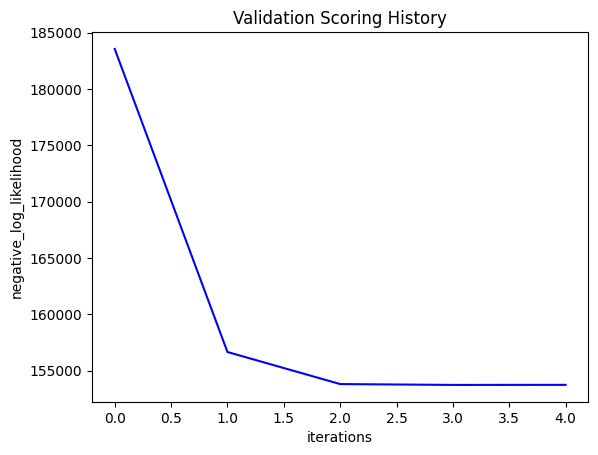

In [28]:
glm.plot(metric='negative_log_likelihood')

 We can also generate a variable importance plot to see how each of our features contribute to the linear model.

``` As we can see after 2 iterations, the scores dont really improve after this time We can also use the default number of iterations and use early stopping; that way, the model will stop training when it is no longer improving. We will use early stopping when we start tuning our models.```

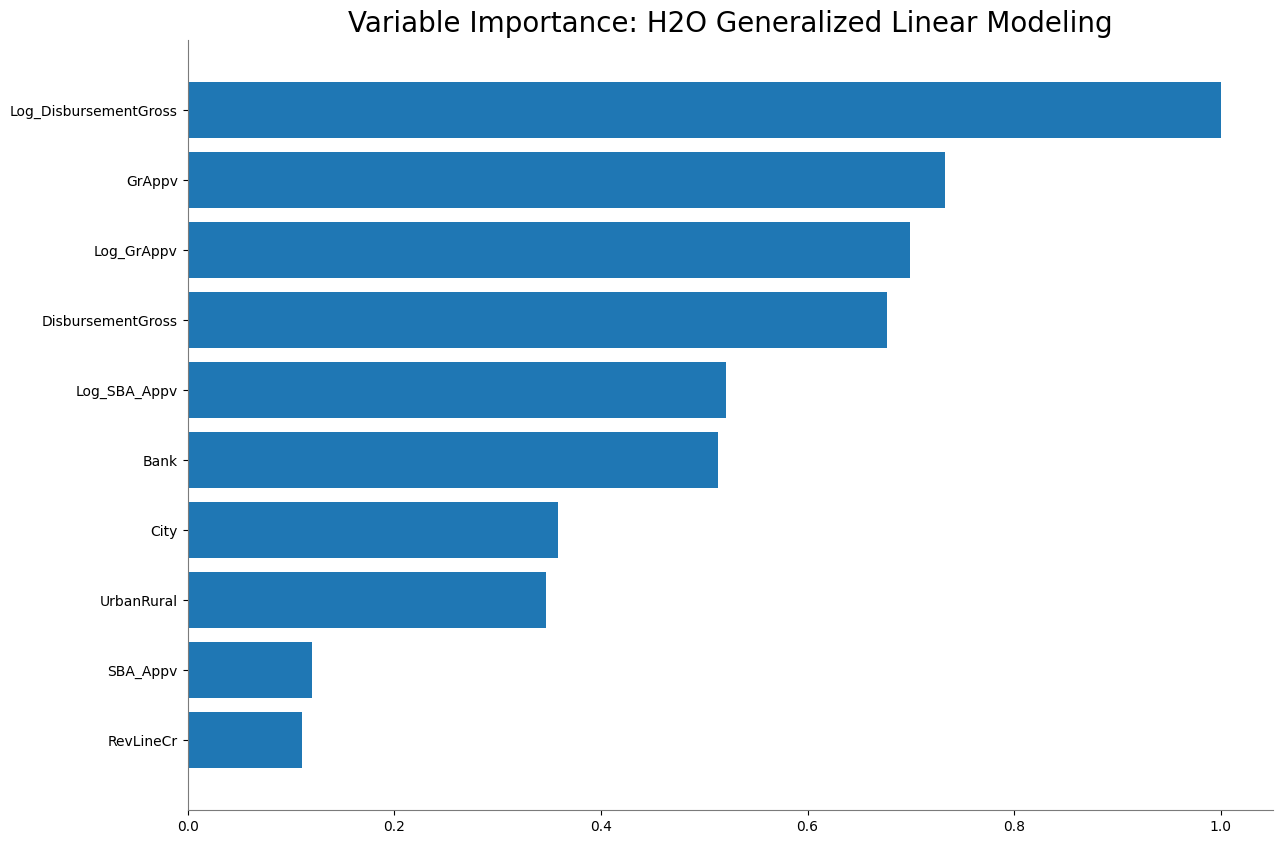

<Figure size 640x480 with 0 Axes>

In [29]:
glm.varimp_plot()

``` From the variable importance plot, we can see that the most significant feature is Log_DisbursementGross. We can also see Gr_Appv, (Log_Gr_Appv) DisbursementGross, and Log_SBA_Appv are the next most important variables. As this is understood by the fact, that if your ```

``` DisbursementGross provides information about the size of the loans granted to small businesses. This information is crucial for understanding the financial impact of SBA loans on the businesses they support. The loan amount disbursed is often indicative of the level of risk associated with a borrower. Larger loan amounts may indicate higher financial stability, while smaller loans may be associated with smaller or riskier businesses.```

``` SBA_Appv (Log_SBA_Appv) The variable confirms that the SBA has approved a loan for a specific borrower. It signifies that the borrower has successfully gone through the SBA's application and approval process Lenders and borrowers use this variable to determine if they are eligible for SBA loans and to understand the maximum loan amount that can be approved for their business.he variable is important for assessing the economic impact of SBA loans. By analyzing the approved loan amounts, one can estimate the potential economic impact in terms of job creation, business expansion, and overall economic growth.```

``` he "Bank" variable helps identify the specific financial institutions that are participating in the SBA loan program. This information is crucial for understanding which banks are actively providing SBA loans to small businesses.```

The Top 4 Variables with their relative importance is as follows:

Log_DisbursementGross: 1.0742711

Log_Gr_Appv: 0.7507896

Log_SBA_Appv: 0.5599474

Bank: 0.5510707

In [30]:
glm.predict(valid).head(10)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.970777,0.029223
1,0.471275,0.528725
0,0.951736,0.0482639
0,0.951392,0.0486081
0,0.945459,0.0545409
0,0.92252,0.0774796
0,0.855034,0.144966
0,0.865822,0.134178
0,0.919617,0.0803829
1,0.759493,0.240507


``` These columns contain the predicted probabilities for each class. "p0" represents the probability of an observation belonging to class 0 (Not Defaulted), and "p1" represents the probability of it belonging to class 1 (Defaulted on Loan). These probabilities can be used to assess the model's confidence in its predictions.```

# H2O Model Tuning

```We Tune our model with lambda_search = True, as this will automatically tune the model. Other parameters that we can alter are max_active_predictors (feature selection parameter), nlambdas, which allows you to specify the number of lambda values, or the regularization strengths, to be used in the elastic net regularization path, and solver, which specify the algorithm or optimization method that the GLM model should use to find the solution``

```A value of alpha = 1 represents Lasso Regularization and a value of alpha = 0 produces Ridge regression```

``` lambda is employed for regularization strength ```
``` missing_value_handling parameter allows to specify how we want to handle any missing data (options are skip and MeanImputation)```

In [31]:
glm_grid = h2o.grid.H2OGridSearch (
    
    H2OGeneralizedLinearEstimator(family = "binomial",
                                  lambda_search = True),
    
    hyper_params = {"alpha": [x*0.01 for x in range(0, 50)],
                    "missing_values_handling" : ["Skip", "MeanImputation"]},
    
    grid_id = "glm_random_grid",
    
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":300,
        "max_runtime_secs":300,
        "seed":42})

%time glm_grid.train(x = train_X, y = train_y, training_frame = train, validation_frame = valid)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
CPU times: total: 984 ms
Wall time: 5min 3s


,alpha,missing_values_handling,model_ids,logloss
,0.0,Skip,glm_random_grid_model_11,0.3916081
,0.0,MeanImputation,glm_random_grid_model_34,0.3916081
,0.44,MeanImputation,glm_random_grid_model_28,0.3917570
,0.48,Skip,glm_random_grid_model_2,0.3917586
,0.48,MeanImputation,glm_random_grid_model_36,0.3917586
,0.43,MeanImputation,glm_random_grid_model_10,0.3917621
,0.43,Skip,glm_random_grid_model_22,0.3917621
,0.4700000,MeanImputation,glm_random_grid_model_26,0.3917632
,0.4700000,Skip,glm_random_grid_model_43,0.3917632
,0.42,MeanImputation,glm_random_grid_model_56,0.3917673


In [32]:
sorted_glm_grid = glm_grid.get_grid(sort_by = 'aucpr', decreasing = True)
sorted_glm_grid.sorted_metric_table()
best_model_id = sorted_glm_grid.sorted_metric_table()['model_ids'][0]
best_model_id

'glm_random_grid_model_11'

``` he grid search results sorted by the AUC-PR metric in decreasing order. AUC-PR (Area Under the Precision-Recall Curve) is a metric commonly used to evaluate the performance of binary classification models, especially when dealing with imbalanced datasets. Sorting in decreasing order means that the models with the highest AUC-PR values will appear at the top of the sorted list. Higher AUC-PR values indicate better precision-recall trade-offs in the models.```

sorted_metric_table() function provides an easy way to examine and analyze the results, allowing you to identify the best-performing models based on the chosen metric (AUC-PR in this case).

As in this case we can see the best model is ``` glm_random_grid_model_11``` with AUCPR values as ``` 0.439303```

In [33]:
tuned_glm = sorted_glm_grid.models[0]
tuned_glm.summary()

,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,Ridge ( lambda = 1.252E-5 ),"nlambda = 30, lambda.max = 12.525, lambda.min = 1.252E-5, lambda.1se = -1.0",27,27,54,py_3_sid_9cdc


``` Here we receive the best model for grid search along with the parameters fro the best model```

Lets evaluate the model on the validation set

In [34]:
tuned_glm_perf = tuned_glm.model_performance(valid)
print("Default GLM AUCPR: %.4f \nTuned GLM AUCPR:%.4f" % (glm.aucpr(), tuned_glm_perf.aucpr()))

Default GLM AUCPR: 0.4455 
Tuned GLM AUCPR:0.4393


``` Which suggests are default GLM model having higher AUCPR generalizes better than the tuned model```

# As such we will do Scoring in Scikit-Learn Model which has a better threshold 

Saving the H2o model in the Artifacts

In [35]:
# Define the directory path and the model file name separately
model_directory = "D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project1/artifacts_h2o"
model_filename = "glm_model_h2o.pkl"

# Get the H2O model by its ID
model_h2o = h2o.get_model(best_model_id)

# Construct the full model path
model_path = f"{model_directory}/{model_filename}"

# Create an artifacts dictionary and include the model file path
artifacts_dict = {}
artifacts_dict["h2o_model_path"] = model_path

# Save the H2O model to the specified file path
h2o.save_model(model_h2o, model_path)

'D:\\Work\\Gre\\UTD\\Courses\\Fall\\MIS6341\\Softwares\\Python\\ml-fall-2023\\Project1\\artifacts_h2o\\glm_model_h2o.pkl\\glm_random_grid_model_11'

In [36]:

def score_with_h2o_model(input_data):
    import h2o
    try:
      h2o.cluster().shutdown()
    except:
      pass 
    from h2o.frame import H2OFrame
    h2o.init(max_mem_size = "4G", nthreads=16)
    try:
        # Load the saved H2O model
        model_path = "D:/Work/Gre/UTD/Courses/Fall\MIS6341/Softwares/Python/ml-fall-2023/Project1/artifacts_h2o/glm_model_h2o.pkl/glm_random_grid_model_11"
        loaded_model = h2o.load_model(model_path)

        # Convert input_data to an H2O frame
        input_h2o = h2o.H2OFrame(input_data)

        # Use the loaded model for scoring
        predictions = loaded_model.predict(input_h2o)

        # Extract the predictions as a Pandas DataFrame
        predictions_df = predictions.as_data_frame()

        # Return the prediction results
        return predictions_df

    except Exception as e:
        return f"Error: {e}"

In [37]:
score_with_h2o_model(valid)

H2O session _sid_9cdc closed.
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from D:\Work\Gre\UTD\Courses\Fall\MIS6341\Softwares\Python\ml-fall-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Asus\AppData\Local\Temp\tmp_po7by6d
  JVM stdout: C:\Users\Asus\AppData\Local\Temp\tmp_po7by6d\h2o_Asus_started_from_python.out
  JVM stderr: C:\Users\Asus\AppData\Local\Temp\tmp_po7by6d\h2o_Asus_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 months and 14 days
H2O_cluster_name:,H2O_from_python_Asus_rhb1fn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.548 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


'Error: Argument `python_obj` should be a None | list | tuple | dict | numpy.ndarray | pandas.DataFrame | scipy.sparse.issparse, got H2OFrame      City     State    Zip       Bank    BankState    NAICS       NoEmp    NewExist    CreateJob    RetainedJob    FranchiseCode    UrbanRural    RevLineCr     LowDoc    DisbursementGross    BalanceGross     GrAppv    SBA_Appv    MIS_Status    Log_DisbursementGross    Log_GrAppv    Log_SBA_Appv    Log_BalanceGross    TotalJobs    IncomeToLoanRatio    EmployeesToLoanRatio    JobPerLoan    Gauren_SBA_Appv    DefaultRate\n0.11465    0.184773  93001  0.0314465     0.218517   235910   0.600407     0.17044    -0.0353733     -0.0454543                1     0.0716743     0.15307   0.187063              0.358949     -0.00229552   0.394801    0.410973             0                 0.306712      0.332752        0.344279         -0.00229816   -0.0808276             0.873414                1.46094    -0.196674             0.960651        17.5096\n0.337588   0

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from copy import deepcopy

def train_model(df):
    """
    Train sample model and save artifacts
    """
    from sklearn.linear_model import LogisticRegression
    import pickle
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.metrics import average_precision_score
    import numpy as np
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    
    target_col = "MIS_Status"
    cols_to_drop = ['City', 'State', 'Zip','Bank', 'BankState', 'LowDoc','RevLineCr','MIS_Status']
    # Removing the index column
    if "index" in df.columns:
        df.drop(columns="index", inplace=True)
    y = df[target_col] if target_col in df.columns else None
    X = df.drop(columns=[target_col]) if target_col in df.columns else df.copy()


    # Relacing Missing values
    
    for i in df['RevLineCr']:
      if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
        print("RevLineCr",df['RevLineCr'].unique())

    for i in df['LowDoc']:
      if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
        print("LowDoc",df['LowDoc'].unique())

    for i in df['NewExist']:
      if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
        print("NewExist",df['NewExist'].unique())


    category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    for column in category_cols:
        df[column]=df[column].fillna(df[column].mode()[0])

    # Target encoding the categorical columns
    categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    encoder = ce.TargetEncoder(cols=categorical_columns)
    encoder.fit(df[categorical_columns], df['MIS_Status'])
    train_encoded = encoder.transform(df[categorical_columns])
    train_encoded = train_encoded.add_suffix('_trg')
    #train_encoded = pd.concat([train_encoded, data], axis=1)
    train_encoded = pd.concat([train_encoded, df], axis=1)
    for column in categorical_columns:
        train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)
    
    # Renaming the columns
    #train_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in train_encoded.columns}, inplace=False)
    print(train_encoded.columns)
    


    # Adding Features
    import numpy as np
    # Apply the log transformation to the specific feature in your training data
    small_constant = 1e-10  # You can adjust this constant as needed
    # df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
    train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
    train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
    train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
    train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])
    train_encoded['TotalJobs'] = train_encoded['CreateJob'] + train_encoded['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    train_encoded['IncomeToLoanRatio'] = train_encoded['DisbursementGross'] / train_encoded['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    train_encoded['EmployeesToLoanRatio'] = train_encoded['NoEmp'] / train_encoded['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    train_encoded['JobPerLoan'] = train_encoded['TotalJobs'] / train_encoded['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    train_encoded['Gauren_SBA_Appv'] = train_encoded['GrAppv'] / train_encoded['SBA_Appv']

    
    # Scaling the numerical columns
    numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross',
                        'Log_DisbursementGross', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross','TotalJobs','IncomeToLoanRatio', 
                        'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv']
    
    scaler = StandardScaler()
    #fit and transform separately
    scaler.fit(train_encoded[numerical_columns])
    train_encoded[numerical_columns] = scaler.transform(train_encoded[numerical_columns])
      

    #X = df.copy()
    #X = X.reset_index(drop=True)

    clf = LogisticRegression(random_state=42,max_iter=100,n_jobs=-1, verbose=1)
    columns_to_train = [col for col in train_encoded.columns if col not in cols_to_drop]
    clf_ = clf.fit(train_encoded[columns_to_train],y)

    # Evaluate the model using AUCPR
    aucpr_score = average_precision_score(y_true=y, y_score=clf_.predict_proba(train_encoded[columns_to_train])[:, 1])
    print("AUCPR score:", aucpr_score)
       
    
    param_grid = {'C':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                 'penalty': ['l2', 'l1', 'elasticnet'],
                 'solver': ['lbfgs'], # 'newton-cholesky', 'sag'
                 'l1_ratio': [0.1, 0.3, 0.7]
                 }
    

    
    grid1 = GridSearchCV(clf_, 
                    param_grid, cv =7 , return_train_score= True)
    grid1.fit(train_encoded[columns_to_train], y)
    print("Best parameters found: ", grid1.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid1.best_score_))
    top_clf = grid1.best_estimator_
        
    #clf = LogisticRegression(max_iter=100, random_state=0)
    
    #columns_to_train = [x for x in X.columns if x not in cols_to_drop]
    #print("Training on following columns:", columns_to_train)
    # Create logistic regression classifier
    # Fit classifier to training data
    # grid1 = GridSearchCV(clf.fit(X[columns_to_train], y), 
    #                  param_grid, cv =7 , return_train_score= True)
    # grid1.fit(X[columns_to_train], y)
    # print(grid1.best_params_)
    #clf.fit(X_train[columns_to_train], y_train)

          
   
    # End Todo
    
    # Saving the artifacts
    artifacts_dict = {
        "model": top_clf,
        "target_encoder": encoder,
        "te_columns": categorical_columns,
        "columns_to_train":columns_to_train,
        "numerical_columns":numerical_columns,
        "category_cols":category_cols,
        "scaler":scaler,
        "h2o_model_path":model_path
    }

    #calculating threshold
    if y is not None:
        optimal_threshold = calculate_optimal_threshold(clf_, train_encoded[columns_to_train], y)
        print(f"Optimal Threshold: {optimal_threshold}")
        # Saving the threshold in artifacts
        artifacts_dict["threshold"] = optimal_threshold

    artifacts_dict_file = open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project1/artifacts/artifacts_dict_file.pkl", "wb")
    pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
    
    artifacts_dict_file.close()    
    return clf_

In [39]:
from sklearn.model_selection import train_test_split
        
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project1/SBA_loans_project_1.csv")
target = "MIS_Status"
y = df[target]
x = df.drop(columns=[target])

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
df_train = X_train.copy()
df_train[target] = y_train
train_model(df_train)

RevLineCr ['Y' 'N' 'T' nan '`' 'R' '1' '.' '5' '2' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' nan '`' 'R' '1' '.' '5' '2' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' '`' 'R' '1' '.' '5' '2' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' 'R' '1' '.' '5' '2' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' '1' '.' '5' '2' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' '.' '5' '2' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' '5' '2' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' '2' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' '3' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' 'A' '-' '7' 'C']
RevLineCr ['Y' 'N' '-' '7' 'C']
RevLineCr ['Y' 'N' '7' 'C']
RevLineCr ['Y' 'N' 'C']
RevLineCr ['Y' 'N']
LowDoc ['N' 'Y' 'R' 'S' 'C' '0' 'A' '1']
LowDoc ['N' 'Y' 'S' 'C' '0' 'A' '1']
LowDoc ['N' 'Y' 'C' '0' 'A' '1']
LowDoc ['N' 'Y' '0' 'A' '1']
LowDoc ['N' 'Y' 'A' '1']
LowDoc ['N' 'Y' '1']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None]
NewExist [1.0 2.0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


AUCPR score: 0.15862387003852957


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.

Best parameters found:  {'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.82
Optimal Threshold: 0.5050505050505051


LogisticRegression(n_jobs=-1, random_state=42, verbose=1)

In [40]:
import pickle

def load_and_print_artifacts_dict(path):
    artifacts_dict = pickle.load(open(path, "rb"))

    print("Target encoder mapping:")
    print([ac for ac in artifacts_dict["target_encoder"].mapping])

    print("Columns to train:")
    print([ac for ac in artifacts_dict["columns_to_train"]])

if __name__ == "__main__":
    load_and_print_artifacts_dict("./Artifacts/artifacts_dict_file.pkl")

Target encoder mapping:
['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc', 'NewExist']
Columns to train:
['City_trg', 'State_trg', 'Bank_trg', 'BankState_trg', 'RevLineCr_trg', 'LowDoc_trg', 'NewExist_trg', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Log_DisbursementGross', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'TotalJobs', 'IncomeToLoanRatio', 'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv']
